In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Titanic.csv') 
print("   (Instancias, Atributos): ", df.shape)
df

   (Instancias, Atributos):  (1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,A.5. 3236,8.05,S,NaN,NaN
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,S,NaN
1307,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,359309,8.05,S,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   object 
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   object 
 10  Cabin        1068 non-null   object 
 11  Embarked     270 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 122.8+ KB


In [5]:
df_cols = df.columns
df_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Datos faltantes

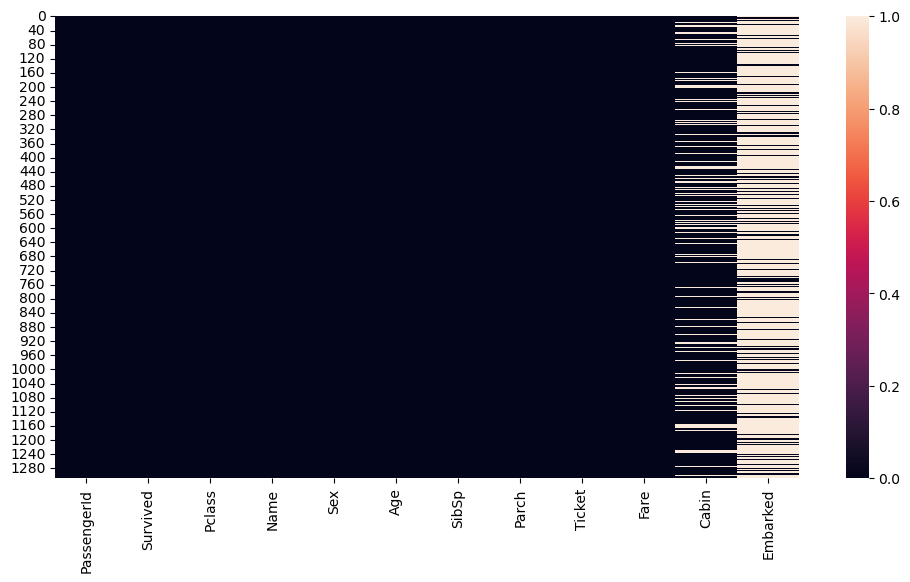

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull());

In [11]:
# Valores faltantes
nan_count = df.isna().sum()
nan_count = pd.DataFrame(nan_count.items(), columns=['Atributo', 'NaN']).T
nan_count

,0,1,2,3,4,5,6,7,8,9,10,11
Atributo,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
NaN,0,0,0,0,0,0,0,0,0,0,241,1039


# Observaciones por atributo

In [12]:
# Observaciones por atributo

obs_vals = {col: df[col].nunique() for col in df_cols}
obs_df = (pd.DataFrame(obs_vals.items(), columns=['Atributo', 'Obs'])).T
obs_df

,0,1,2,3,4,5,6,7,8,9,10,11
Atributo,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Obs,1309,2,3,1307,2,99,8,230,818,282,177,3


# Procesamiento de datos

In [17]:
# Observando el dataset, notamos que es necesario procesarlo antes de pasar
# a la estadística descriptiva, ya que presenta problemas con la calidad 
# de datos, por ejemplo, valores atípicos no válidos y errores de cardinalidad.

# Limpieza e imputación de datos

In [ ]:
# Analizando los datos, observamos que el atributo "Parch" presenta outliers y 
# outliers no esperados, al igual que "Ticket", "Fare", "Cabin" y "Embarked".
# Filtrando únicamente los outliers en "Parch", observamos que dichos valores 
# están presentes en "Ticket", y las instancias en donde "Parch" presenta 
# outliers son las mismas en donde los atributos antes mencionados presentan
# también outliers. Observando esto, identificamos que los outliers en "Parch"
# son en realidad valores de "Ticket", los outliers en "Ticket" son valores
# de "Fare", los outliers de "Fare" son valores de "Cabin" y los outliers
# de "Cabin" son valores de "Embarked".
# Por lo tanto, pasaremos dichos valores al atributo correcto.

In [28]:
df_parch_out = df[(df['Parch'] != '0') & (df['Parch'] != '1') 
                & (df['Parch'] != '2') & (df['Parch'] != '3')
                & (df['Parch'] != '4') & (df['Parch'] != '5')
                & (df['Parch'] != '6')]
df_parch_out 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,0.0,0,330877,8.4583,Q,NaN,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",male,0.0,0,244373,13,S,NaN,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,0.0,0,2649,7.225,C,NaN,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,0.0,0,2631,7.225,C,NaN,NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,0.0,0,330959,7.8792,Q,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,0.0,0,334915,7.7208,Q,NaN,NaN
1301,1302,1,3,"Naughton, Miss. Hannah",female,0.0,0,365237,7.75,Q,NaN,NaN
1304,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,A.5. 3236,8.05,S,NaN,NaN
1307,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,359309,8.05,S,NaN,NaN


In [134]:
# Copiar dataset original
df_p = df.copy()

In [135]:
# Pasando datos de "Cabin" a "Embarked
df_p.loc[((df_p['Cabin'] == 'C') | (df_p['Cabin'] == 'S') | (df_p['Cabin'] == 'Q')), 'Embarked'] = df_p['Cabin']
df_p.loc[((df_p['Cabin'] == 'C') | (df_p['Cabin'] == 'S') | (df_p['Cabin'] == 'Q')), 'Cabin'] = ''
df_p

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,A.5. 3236,8.05,S,NaN,NaN
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S
1307,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,359309,8.05,S,NaN,NaN


In [136]:
# Pasando datos de "Fare" a "Embarked
df_p.loc[((df_p['Fare'] == 'C') | (df_p['Fare'] == 'S') | (df_p['Fare'] == 'Q')), 'Embarked'] = df_p['Fare']
df_p.loc[((df_p['Fare'] == 'C') | (df_p['Fare'] == 'S') | (df_p['Fare'] == 'Q')), 'Fare'] = ''
df_p

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,A.5. 3236,8.05,,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S
1307,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,359309,8.05,,NaN,S


In [137]:
# Pasando datos de "Fare" a "Cabin"
df_p.loc[(df_p['Fare'].str.contains('[a-zA-Z]')), 'Cabin'] = df_p['Fare']
df_p.loc[(df_p['Fare'].str.contains('[a-zA-Z]')), 'Fare'] = ''
df_p

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,A.5. 3236,8.05,,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S
1307,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,359309,8.05,,NaN,S


In [138]:
# Verificar que Fare esté limpio
contiene_letra = df_p[df_p['Fare'].str.contains('[a-zA-Z]')]
contiene_letra

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [139]:
# Máximo de "Fare"
df_p['Fare'] = (pd.to_numeric(df_p['Fare'], errors='coerce'))
df_p['Fare'].max()

512.3292

In [140]:
# Definir función para pasar datos de Ticket a Fare, 
# en el rango 1 a 513 (basándose en el máximo de Fare)

def value_is_fare(val):
    try:
        num_val = float(val)
        # Verificar que el valor esté en el rango de 1 a 513
        if(1 <= num_val <= 513):
            return True
        else:
            return False
    except ValueError:
        # Si no se puede convertir a float, no es un valor válido
        return False

df_p.loc[((df_p['Ticket'].apply(value_is_fare)) & (df_p['Fare'].isna())), 'Fare'] = df_p['Ticket']
df_p.loc[(df_p['Ticket'].apply(value_is_fare)), 'Ticket'] = ''
df_p

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,A.5. 3236,,8.05,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S
1307,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,359309,,8.05,NaN,S


In [141]:
# Convertir Fare a float
df_p['Fare'] = (pd.to_numeric(df_p['Fare'], errors='coerce'))
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   object 
 8   Ticket       1309 non-null   object 
 9   Fare         1299 non-null   float64
 10  Cabin        1068 non-null   object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [142]:
# Definir función para pasar datos de Parch a Ticket, 
# para cualquier valor distinto de 0,1,2,3,4,5,6

def value_is_ticket(val):
    try:
        num_val = float(val)
        # Verificar que el valor esté en el rango de 0 a 6
        if(0 <= num_val <= 6):
            return False
        else:
            return True
    except ValueError:
        # Si no se puede convertir a float, es un valor válido
        return True

df_p.loc[((df_p['Parch'].apply(value_is_ticket)) & (df_p['Ticket'].isna())), 'Ticket'] = df_p['Parch']
df_p.loc[(df_p['Parch'].apply(value_is_ticket)), 'Parch'] = ''
df_p

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,,,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,,S
1307,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,,,8.0500,NaN,S


In [143]:
# Convertir Parch a numeric
df_p['Parch'] = (pd.to_numeric(df_p['Parch'], errors='coerce'))
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1046 non-null   float64
 8   Ticket       1309 non-null   object 
 9   Fare         1299 non-null   float64
 10  Cabin        1068 non-null   object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [145]:
# Guardar dataset procesado
df_p.to_csv('Titanic_processed.csv', index=False)

In [146]:
# Valores faltantes 
nan_count_p = df_p.isna().sum()
nan_count_p = pd.DataFrame(nan_count_p.items(), columns=['Atributo', 'NaN']).T
nan_count_p

,0,1,2,3,4,5,6,7,8,9,10,11
Atributo,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
NaN,0,0,0,0,0,0,0,263,0,10,241,2


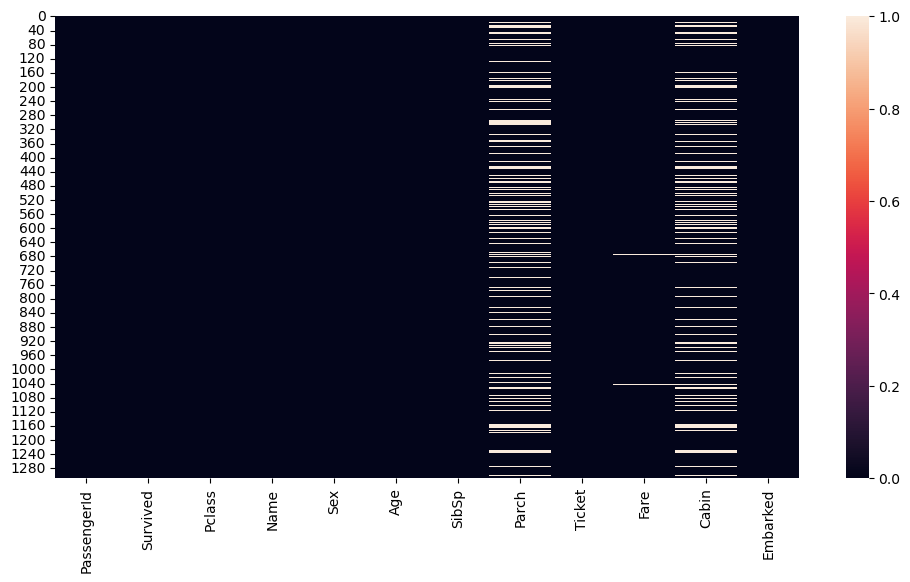

In [151]:
# Graficar valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df_p.isnull());

In [152]:
# Observaciones por atributo

obs_vals_p = {col: df_p[col].nunique() for col in df_cols}
obs_df_p = (pd.DataFrame(obs_vals_p.items(), columns=['Atributo', 'Obs'])).T
obs_df_p

,0,1,2,3,4,5,6,7,8,9,10,11
Atributo,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Obs,1309,2,3,1307,2,99,8,7,734,281,187,3


# Separación de datos categóricos y numéricos

In [154]:
# PassengerID se considera categórico ya que representa a cada 
# pasajero, no un dato continuo, lo mismo ocurre con 
# PClass (Primera, segunda o tercera clase)
cat_cols_all = ['PassengerId', 'Name', 'Pclass', 'Sex', 'Ticket', 
            'Cabin', 'Embarked', 'Survived']

num_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Separar atributos útiles
cat_cols = ['Pclass', 'Sex', 'Cabin', 'Embarked', 'Survived']

In [155]:
df_1= df_p[cat_cols]
df_1

,Pclass,Sex,Cabin,Embarked,Survived
0,3,male,,S,0
1,1,female,C85,C,1
2,3,female,,S,1
3,1,female,C123,S,1
4,3,male,,S,0
...,...,...,...,...,...
1304,3,male,NaN,S,0
1305,1,female,C105,C,1
1306,3,male,,S,0
1307,3,male,NaN,S,0


In [156]:
df_2= df_p[num_cols]
df_2

,Age,SibSp,Parch,Fare
0,22.0,1,0.0,7.2500
1,38.0,1,0.0,71.2833
2,26.0,0,0.0,7.9250
3,35.0,1,0.0,53.1000
4,35.0,0,0.0,8.0500
...,...,...,...,...
1304,0.0,0,NaN,8.0500
1305,39.0,0,0.0,108.9000
1306,38.5,0,0.0,7.2500
1307,0.0,0,NaN,8.0500


# Estadística descriptiva en datos categóricos

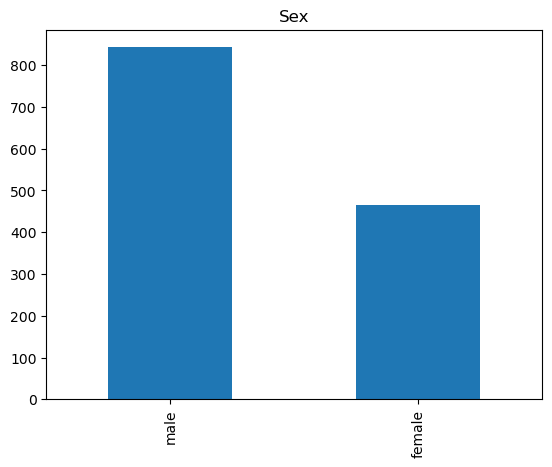

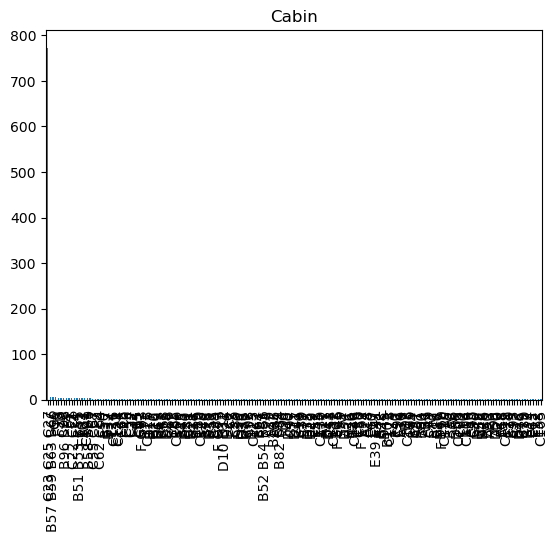

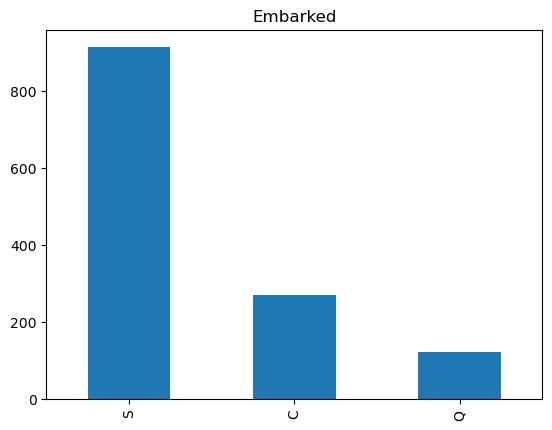

In [157]:
# Moda en datos categóricos

for col in df_1.select_dtypes(include=['object']):
    df_1[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

# Estadística descriptiva en datos numéricos

In [158]:
# Mínimo
min_vals = {col: df_p[col].min() for col in num_cols}
min_df = pd.DataFrame(min_vals.items(), columns=['Atributo', 'Min']).T
min_df

,0,1,2,3
Atributo,Age,SibSp,Parch,Fare
Min,0.0,0.0,0.0,0.0


In [159]:
# Máximo
max_vals = {col: df_p[col].max() for col in num_cols}
max_df = pd.DataFrame(max_vals.items(), columns=['Atributo', 'Max']).T
max_df

,0,1,2,3
Atributo,Age,SibSp,Parch,Fare
Max,80.0,9.0,6.0,512.3292


In [160]:
# Media
mean_vals = {col: df_p[col].mean() for col in num_cols}
mean_df = (pd.DataFrame(mean_vals.items(), columns=['Atributo', 'Mean']).round(2)).T
mean_df

,0,1,2,3
Atributo,Age,SibSp,Parch,Fare
Mean,23.97,0.45,0.42,33.53


In [161]:
# Desviación estandar
std_vals = {col: df_p[col].std() for col in num_cols}
std_df = (pd.DataFrame(std_vals.items(), columns=['Atributo', 'Std']).round(2)).T
std_df

,0,1,2,3
Atributo,Age,SibSp,Parch,Fare
Std,17.47,0.93,0.84,51.86


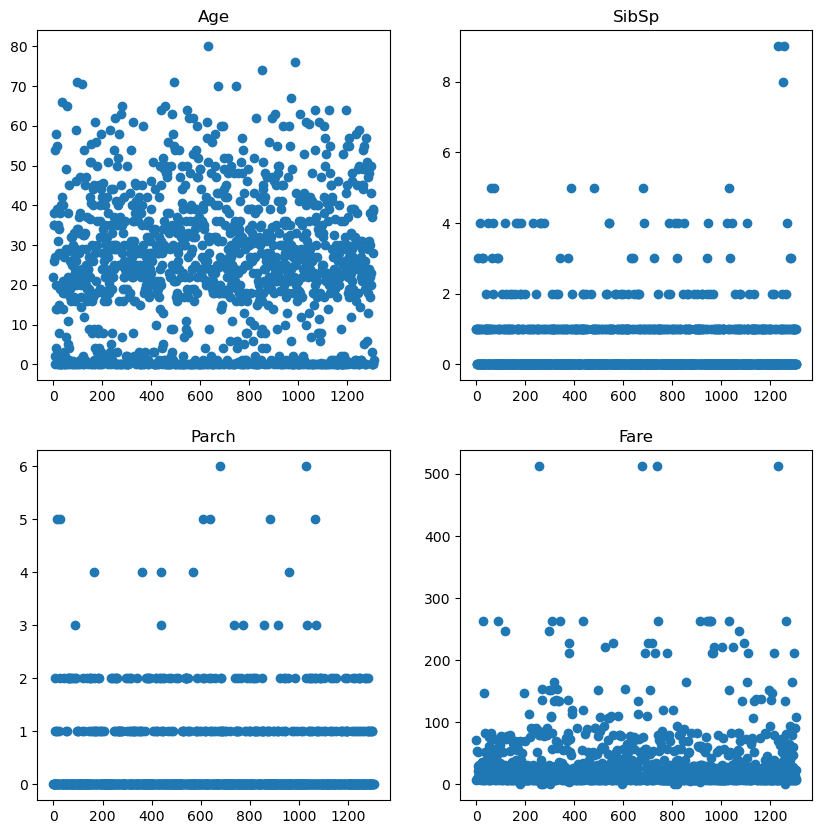

In [164]:
# Scatter plot

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for i, col in enumerate(df_2.columns):
    axs[i//2][i%2].scatter(df_2.index, df_2[col])
    axs[i//2][i%2].set_title(col)


plt.show()

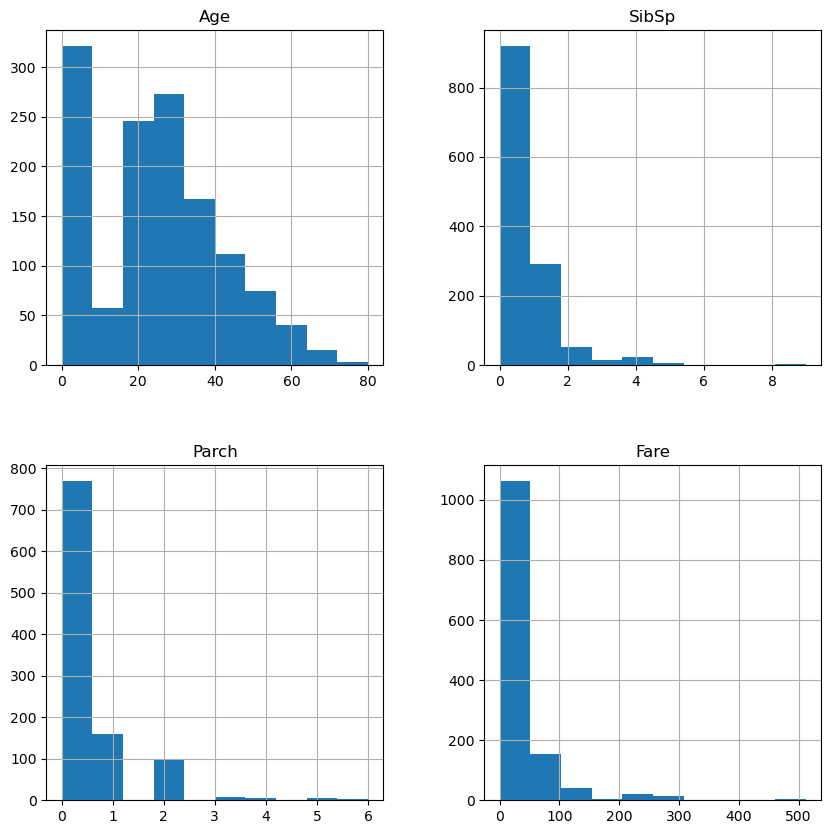

In [166]:
#Histograma

df_2.hist(figsize=(10,10))

plt.show()

In [167]:
# Distribución normal

pdf = df_2.copy()
for i,col in enumerate(df_2.columns):
    df_mean = np.mean(df_2[col])
    df_std = np.std(df_2[col])
    
    # Calcular función de densidad de probabilidad normal
    pdf[col] = stats.norm.pdf(df_2[col].sort_values(), df_mean, df_std)
   # pdf = pdf.reset_index(drop=True)
    
pdf

,Age,SibSp,Parch,Fare
0,0.008903,3.830026e-01,0.419207,0.006243
1,0.008903,3.830026e-01,0.419207,0.006243
2,0.008903,3.830026e-01,0.419207,0.006243
3,0.008903,3.830026e-01,0.419207,0.006243
4,0.008903,3.830026e-01,0.419207,0.006243
...,...,...,...,...
1304,0.000609,2.413598e-06,NaN,NaN
1305,0.000609,2.413598e-06,NaN,NaN
1306,0.000378,1.485091e-15,NaN,NaN
1307,0.000270,1.219975e-19,NaN,NaN


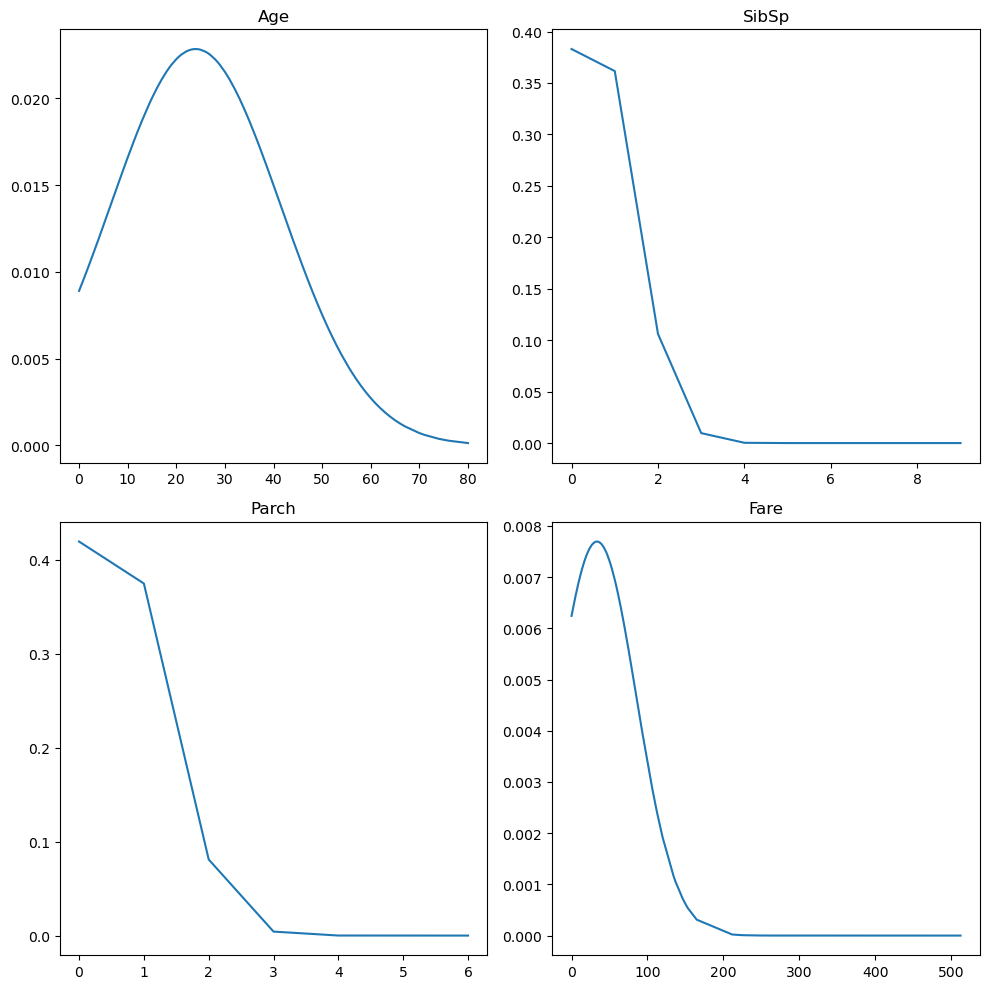

In [170]:
# Distribución normal

fig, axes = plt.subplots(2,2 , figsize=(10,10))

for i,col in enumerate(df_2.columns):
    df_mean = np.mean(df_2[col])
    df_std = np.std(df_2[col])
    
    # Calcular función de densidad de probabilidad normal
    pdf = stats.norm.pdf(df_2[col].sort_values(), df_mean, df_std)
    
    axes[i//2][i%2].plot(df_2[col].sort_values(), pdf)
    axes[i//2][i%2].set_title(col)

plt.tight_layout()
plt.show()

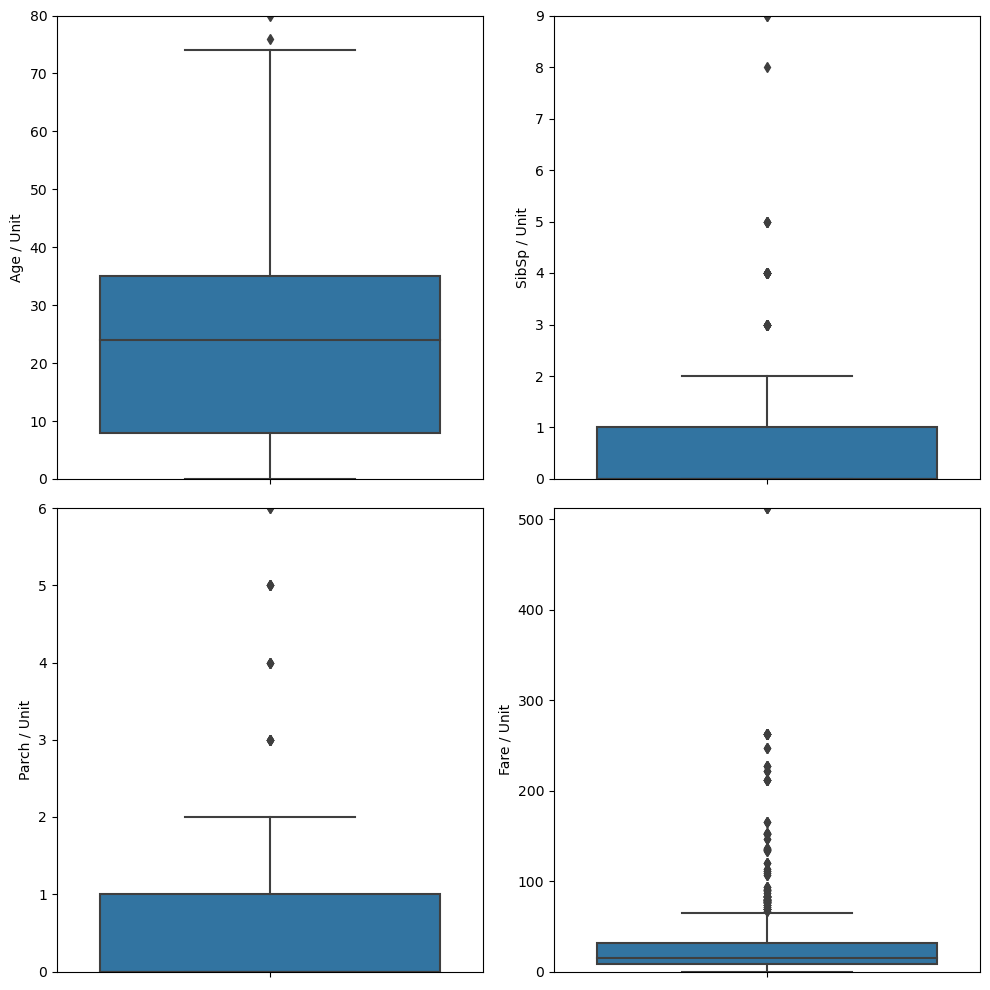

In [171]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i,col in enumerate(df_2.columns):
    ax = sns.boxplot(y=df_2[col], ax=axes.flatten()[i])
    ax.set_ylim(df_2[col].min(), df_2[col].max())
    ax.set_ylabel(col + ' / Unit')
plt.tight_layout()
plt.show()

In [172]:
Q1 = df_2.quantile(0.25)
Q3 = df_2.quantile(0.75)
IQR = Q3 - Q1
IQR

Age      27.0000
SibSp     1.0000
Parch     1.0000
Fare     23.3792
dtype: float64

In [173]:
outliers = ((df_2 < (Q1 - 1.5 * IQR)) | (df_2 > (Q3 + 1.5 * IQR))).sum()
out_count = pd.DataFrame(outliers.items(), columns=['Atributo', 'Outliers']).T
out_count

,0,1,2,3
Atributo,Age,SibSp,Parch,Fare
Outliers,2,48,21,171


# Imputación determinista: media por clase

In [341]:
df_total = df_p.copy()

In [342]:
# Imputación de media por clase ('Pclass') usando una función lambda
df_total['Fare'] = df_total.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))
df_total

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0.0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0.0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0.0,373450,8.0500,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,0.0,0,NaN,,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0.0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0.0,SOTON/O.Q. 3101262,7.2500,,S
1307,1308,0,3,"Ware, Mr. Frederick",male,0.0,0,NaN,,8.0500,NaN,S


# Selección de atributos para clasificar

In [343]:
# Con el fin de facilitar la clasificación, SibSp y Parch
# se codificarán como categóricos, pues lo importante es
# si llevaban o no algún familiar con ellos
num_att = ['Age', 'Fare']
cat_att = ['Pclass', 'Sex', 'SibSp', 'Parch']
label = ['Survived']

In [344]:
data = df_total[num_att + cat_att + label]
data

,Age,Fare,Pclass,Sex,SibSp,Parch,Survived
0,22.0,7.2500,3,male,1,0.0,0
1,38.0,71.2833,1,female,1,0.0,1
2,26.0,7.9250,3,female,0,0.0,1
3,35.0,53.1000,1,female,1,0.0,1
4,35.0,8.0500,3,male,0,0.0,0
...,...,...,...,...,...,...,...
1304,0.0,8.0500,3,male,0,NaN,0
1305,39.0,108.9000,1,female,0,0.0,1
1306,38.5,7.2500,3,male,0,0.0,0
1307,0.0,8.0500,3,male,0,NaN,0


# One-hot

In [345]:
# Normalización uno-a-n (one-hot) para atributos categóricos

for column in cat_att:
    if (column == 'SibSp'):
        # Para 'SibSp', se definen las categorías True, False y Unknown
        data['SibSp_True'] = (data[column] >= 0).astype(int)
        data['SibSp_False'] = (data[column] == 0).astype(int)
        data['SibSp_Unknown'] = data[column].isna().astype(int)
        # Se elimina la columna original 'SibSp'
        data.drop(column, axis=1, inplace=True)
    elif (column == 'Parch'):
        # Para 'Parch', se definen las categorías True, False y Unknown
        data['Parch_True'] = (data[column] >= 0).astype(int)
        data['Parch_False'] = (data[column] == 0).astype(int)
        data['Parch_Unknown'] = data[column].isna().astype(int)
        # Se elimina la columna original 'Parch'
        data.drop(column, axis=1, inplace=True)
    else:
        # Para los otros atributos se aplica one-hot encoding directo
        one_hot = pd.get_dummies(data[column], prefix=column)
        data = pd.concat([data, one_hot], axis=1)
        data.drop(column, axis=1, inplace=True)

data

,Age,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_True,SibSp_False,SibSp_Unknown,Parch_True,Parch_False,Parch_Unknown
0,22.0,7.2500,0,0,0,1,0,1,1,0,0,1,1,0
1,38.0,71.2833,1,1,0,0,1,0,1,0,0,1,1,0
2,26.0,7.9250,1,0,0,1,1,0,1,1,0,1,1,0
3,35.0,53.1000,1,1,0,0,1,0,1,0,0,1,1,0
4,35.0,8.0500,0,0,0,1,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,8.0500,0,0,0,1,0,1,1,1,0,0,0,1
1305,39.0,108.9000,1,1,0,0,1,0,1,1,0,1,1,0
1306,38.5,7.2500,0,0,0,1,0,1,1,1,0,1,1,0
1307,0.0,8.0500,0,0,0,1,0,1,1,1,0,0,0,1


# Normalización de atributos numéricos

In [346]:
def min_max_normalization(df):
    # Calcular el mínimo y máximo de cada atributo
    min_original = df.min()
    max_original = df.max()
    
    # Definir el mínimo y máximo normalizado
    min_normalized = 0
    max_normalized = 1

    # Calcular el rango de datos y el rango normalizado
    range_data = max_original - min_original
    range_normalized = max_normalized - min_normalized

    # Aplicar la normalización min-max a cada atributo
    df_normalized = ((df - min_original) / range_data) * range_normalized + min_normalized

    return df_normalized

In [347]:
# Normalizar datos numéricos
data['Age'] = min_max_normalization(data['Age'])
data['Fare'] = min_max_normalization(data['Fare'])
data

,Age,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_True,SibSp_False,SibSp_Unknown,Parch_True,Parch_False,Parch_Unknown
0,0.27500,0.014151,0,0,0,1,0,1,1,0,0,1,1,0
1,0.47500,0.139136,1,1,0,0,1,0,1,0,0,1,1,0
2,0.32500,0.015469,1,0,0,1,1,0,1,1,0,1,1,0
3,0.43750,0.103644,1,1,0,0,1,0,1,0,0,1,1,0
4,0.43750,0.015713,0,0,0,1,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.00000,0.015713,0,0,0,1,0,1,1,1,0,0,0,1
1305,0.48750,0.212559,1,1,0,0,1,0,1,1,0,1,1,0
1306,0.48125,0.014151,0,0,0,1,0,1,1,1,0,1,1,0
1307,0.00000,0.015713,0,0,0,1,0,1,1,1,0,0,0,1


# Guardar dataset procesado

In [348]:
data.to_csv('Titanic_processed_final.csv', index=False)
data

,Age,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_True,SibSp_False,SibSp_Unknown,Parch_True,Parch_False,Parch_Unknown
0,0.27500,0.014151,0,0,0,1,0,1,1,0,0,1,1,0
1,0.47500,0.139136,1,1,0,0,1,0,1,0,0,1,1,0
2,0.32500,0.015469,1,0,0,1,1,0,1,1,0,1,1,0
3,0.43750,0.103644,1,1,0,0,1,0,1,0,0,1,1,0
4,0.43750,0.015713,0,0,0,1,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.00000,0.015713,0,0,0,1,0,1,1,1,0,0,0,1
1305,0.48750,0.212559,1,1,0,0,1,0,1,1,0,1,1,0
1306,0.48125,0.014151,0,0,0,1,0,1,1,1,0,1,1,0
1307,0.00000,0.015713,0,0,0,1,0,1,1,1,0,0,0,1


# Definir clase k-NN y funciones útiles

In [378]:
class kNN:
    def __init__(self, k=5, distance='euclidean'):
        self.k = k
        self.distance = distance

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def minkowski_distance(self, x1, x2, p):
        return np.power(np.sum(np.abs(x1 - x2) ** p), 1/p)

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        if self.distance == 'euclidean':
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        elif self.distance == 'manhattan':
            distances = [self.manhattan_distance(x, x_train) for x_train in self.X_train]
        elif self.distance == 'minkowski':
            distances = [self.minkowski_distance(x, x_train, p=3) for x_train in self.X_train]
        else:
            raise ValueError("Error al ingresar distancia")

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        assigned_class = np.bincount(k_nearest_labels).argmax()
        
        return assigned_class


In [369]:
def get_optimal_k(X, y, k_max, num_folds, distance):
    
    # Prueba valores de 1 a k_max
    k_vals=list(range(1, k_max))
    
    # Lista para almacenar los resultados de la validación cruzada
    cv_mean_acc = []

    # Realizar validación cruzada para cada valor de k
    for k in k_vals:
        # Crear un objeto k-NN para k vecinos
        knn_cv = kNN(k=k, distance=distance)  

        # Realizar validación cruzada para k-folds
        num_folds = 5
        fold_size = len(X) // num_folds

        accuracies = []

        for i in range(num_folds):

            # Dividir los datos en subconjuntos de entrenamiento y prueba
            start = i * fold_size
            end = (i + 1) * fold_size
            X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
            y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
            X_test = X.iloc[start:end]
            y_test = y.iloc[start:end]

            # Entrenar el modelo (almacenar train_dataset)
            knn_cv.fit(X_train.to_numpy(), y_train.to_numpy())

            # Predecir
            y_pred = knn_cv.predict(X_test.to_numpy())

            # Calcular la precisión de la predicción para el k-fold
            accuracy = np.sum(y_pred == y_test) / len(y_test)
            accuracies.append(accuracy)

        # Calcular la media de las precisiones de la validación cruzada para k actual
        cv_mean_acc.append(np.mean(accuracies))
        
    plt.figure(figsize=(10, 6))
    plt.plot(k_vals, cv_mean_acc, marker='o', linestyle='-')
    plt.title(f'Crossvalidation para determinar k - Distancia: {distance}')
    plt.xlabel('Valor de k')
    plt.ylabel('Precisión promedio')
    plt.grid(True)
    plt.show()

    # Obtener el valor de k que maximiza la precisión media
    optimal_k = k_vals[cv_mean_acc.index(max(cv_mean_acc))]
    return optimal_k

In [416]:
def metricas(y_pred, y_test):

    accuracy = np.mean(y_pred == y_test)
    
    # Calcular TP, FP, TN y FN
    TP = np.sum((y_pred == 1) & (y_test == 1))
    FP = np.sum((y_pred == 1) & (y_test == 0))
    TN = np.sum((y_pred == 0) & (y_test == 0))
    FN = np.sum((y_pred == 0) & (y_test == 1))
    
    # Calcular recall, precisión y puntuación F1
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return {
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1-Score': f1_score
    }

# Separar etiqueta de atributos

In [350]:
# Separar las características (X) y las etiquetas (y)
X = data.drop('Survived', axis=1)
X

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_True,SibSp_False,SibSp_Unknown,Parch_True,Parch_False,Parch_Unknown
0,0.27500,0.014151,0,0,1,0,1,1,0,0,1,1,0
1,0.47500,0.139136,1,0,0,1,0,1,0,0,1,1,0
2,0.32500,0.015469,0,0,1,1,0,1,1,0,1,1,0
3,0.43750,0.103644,1,0,0,1,0,1,0,0,1,1,0
4,0.43750,0.015713,0,0,1,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.00000,0.015713,0,0,1,0,1,1,1,0,0,0,1
1305,0.48750,0.212559,1,0,0,1,0,1,1,0,1,1,0
1306,0.48125,0.014151,0,0,1,0,1,1,1,0,1,1,0
1307,0.00000,0.015713,0,0,1,0,1,1,1,0,0,0,1


In [351]:
# Separar las características (X) y las etiquetas (y)
y = data['Survived']
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64

# Dividir en train y test 

In [370]:
# Dividir los datos en subsets de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Determinar k con crossvalidation y distancia Manhattan

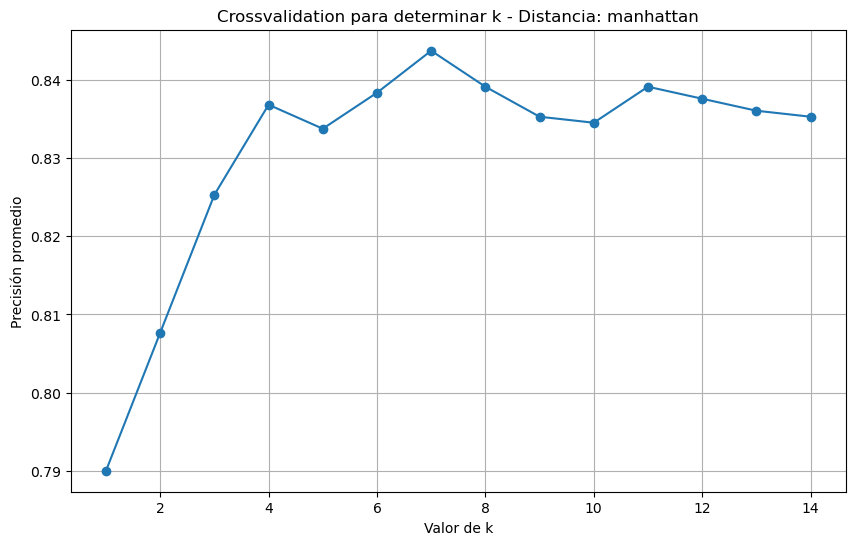

El mejor valor de k es: 7


In [371]:
optimal_k_m = get_optimal_k(X, y, k_max=15, num_folds=5, distance='manhattan')
print(f"El mejor valor de k es: {optimal_k_m}")

# "Entrenar" y predecir con k-NN y distancia Manhattan

In [421]:
# Crear objeto y entrenar modelo k-NN
knn_model_m = kNN(k=optimal_k_m, distance='manhattan')
knn_model_m.fit(X_train.to_numpy(), y_train.to_numpy())

In [422]:
# Realizar predicciones en el conjunto de prueba
y_pred_m = knn_model_m.predict(X_test.to_numpy())
y_pred_m

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,

In [426]:
# Calcular la exactitud del modelo
accuracy_m = np.sum(y_pred_m == y_test) / len(y_test)
print(f'Exactitud del modelo kNN: {accuracy_m}')

Exactitud del modelo kNN: 0.8625954198473282


In [424]:
eval_m = metricas(y_pred_m, y_test)
print(eval_m)

{'Accuracy': 0.8625954198473282, 'Recall': 0.7651006711409396, 'Precision': 0.8571428571428571, 'F1-Score': 0.8085106382978723}


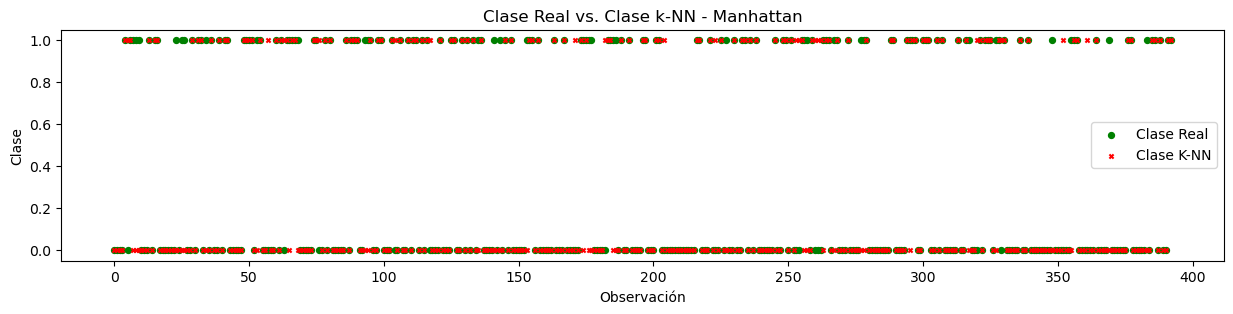

In [413]:
# Graficar observación vs. etiqueta real vs. etiqueta asignada por el clasificador
plt.figure(figsize=(15, 3))
plt.scatter(range(len(y_test)), y_test, c='g', label='Clase Real', marker='o', s=18)
plt.scatter(range(len(y_pred_m)), y_pred_m, c='r', label='Clase K-NN', marker='x', s = 9)
plt.xlabel('Observación')
plt.ylabel('Clase')
plt.legend()
plt.title('Clase Real vs. Clase k-NN - Manhattan')
plt.show()

# Determinar k con crossvalidation y distancia Euclidiana

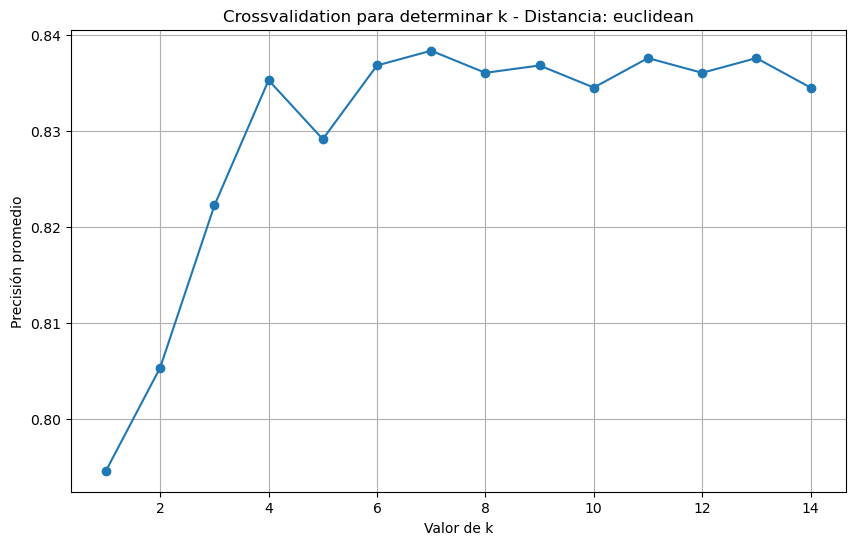

El mejor valor de k es: 7


In [382]:
optimal_k_e = get_optimal_k(X, y, k_max=15, num_folds=5, distance='euclidean')
print(f"El mejor valor de k es: {optimal_k_e}")

# "Entrenar" y predecir con k-NN y distancia Euclidiana

In [383]:
# Crear objeto y entrenar modelo k-NN
knn_model_e = kNN(k=optimal_k_e, distance='euclidean')
knn_model_e.fit(X_train.to_numpy(), y_train.to_numpy())

In [384]:
# Realizar predicciones en el conjunto de prueba
y_pred_e = knn_model_e.predict(X_test.to_numpy())
y_pred_e

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,

In [415]:
# Calcular la exactitud del modelo
accuracy_e = np.sum(y_pred_e == y_test) / len(y_test)
print(f'Exactitud del modelo kNN: {accuracy_e}')

Exactitud del modelo kNN: 0.8600508905852418


In [425]:
eval_e = metricas(y_pred_e, y_test)
print(eval_e)

{'Accuracy': 0.8600508905852418, 'Recall': 0.7651006711409396, 'Precision': 0.8507462686567164, 'F1-Score': 0.8056537102473499}


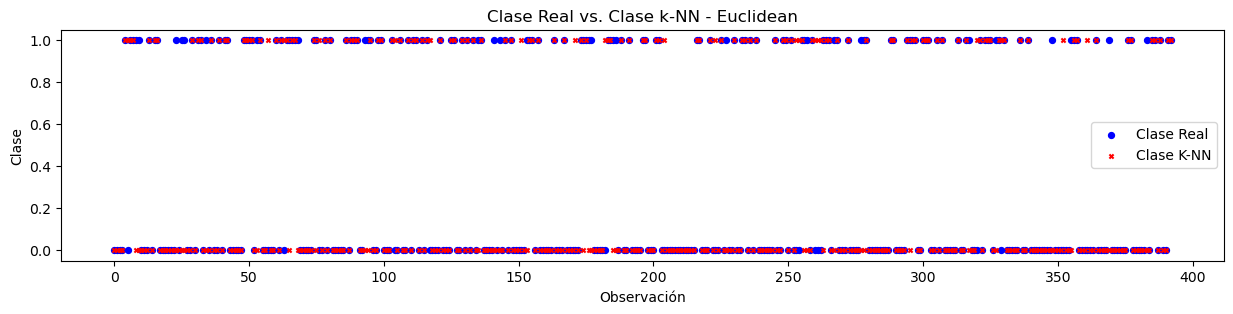

In [412]:
# Graficar observación vs. etiqueta real vs. etiqueta asignada por el clasificador
plt.figure(figsize=(15, 3))
plt.scatter(range(len(y_test)), y_test, c='b', label='Clase Real', marker='o', s=18)
plt.scatter(range(len(y_pred_e)), y_pred_e, c='r', label='Clase K-NN', marker='x', s = 9)
plt.xlabel('Observación')
plt.ylabel('Clase')
plt.legend()
plt.title('Clase Real vs. Clase k-NN - Euclidean')
plt.show()